In [153]:
import os
import numpy as np
import tensorflow as tf
import keras
from scipy import misc, ndimage
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [71]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'elephant'], batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'elephant'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'elephant'], batch_size=10)

Found 722 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [72]:
imgs, labels = next(train_batches)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


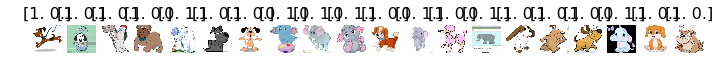

In [6]:
plots(imgs, titles=labels)

In [10]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(299,299,3)),
                   Flatten(),
                   Dense(2, activation='softmax'),
                ])

In [12]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 8s - loss: 9.2679 - acc: 0.4250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 6s - loss: 6.0443 - acc: 0.6250 - val_loss: 7.3264 - val_acc: 0.5455
Epoch 3/5
 - 6s - loss: 7.0517 - acc: 0.5625 - val_loss: 8.4620 - val_acc: 0.4750
Epoch 4/5
 - 6s - loss: 7.0517 - acc: 0.5625 - val_loss: 8.7917 - val_acc: 0.4545
Epoch 5/5
 - 6s - loss: 8.2605 - acc: 0.4875 - val_loss: 8.4620 - val_acc: 0.4750


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


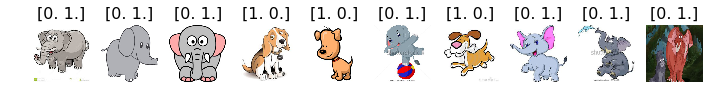

In [73]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [74]:
test_labels = test_labels[:, 0]
test_labels

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [75]:
predictions = model.predict_generator(test_batches, steps=1, verbose=2)

In [43]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [44]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[5 0]
 [5 0]]


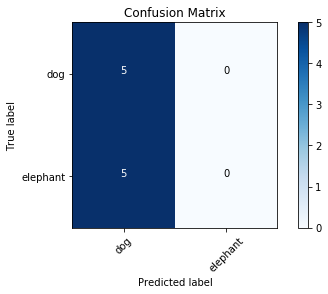

In [48]:
cm_plot_labels = ['dog', 'elephant']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [50]:
vgg16_model = keras.applications.vgg16.VGG16()

In [51]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [52]:
type(vgg16_model)

keras.engine.training.Model

In [130]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    convout = layer
    model.add(layer)

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [66]:
for layer in model.layers:
    layer.trainable = False

In [67]:
model.add(Dense(2, activation='softmax'))

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [69]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 85s - loss: 1.1842 - acc: 0.5250 - val_loss: 0.9835 - val_acc: 0.5000
Epoch 2/5
 - 82s - loss: 0.7973 - acc: 0.6625 - val_loss: 0.7571 - val_acc: 0.6364
Epoch 3/5
 - 90s - loss: 0.9725 - acc: 0.4500 - val_loss: 0.8768 - val_acc: 0.6250
Epoch 4/5
 - 83s - loss: 0.8761 - acc: 0.5750 - val_loss: 0.8868 - val_acc: 0.5758
Epoch 5/5
 - 77s - loss: 0.7660 - acc: 0.6625 - val_loss: 0.7762 - val_acc: 0.5250


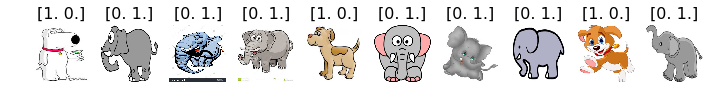

In [78]:
test_images, test_labels = next(test_batches)
plots(test_images, titles=test_labels)

In [80]:
test_labels = test_labels[:, 0]
test_labels

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [92]:
predictions = model.predict_generator(test_batches, steps = 1, verbose=0)

In [93]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[4 3]
 [2 1]]


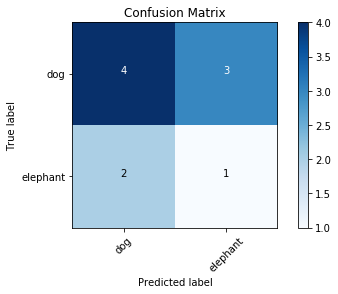

In [94]:
cm_plot_labels = ['dog', 'elephant']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [109]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
plt.imshow(ims[i], interpolation=None if interp else 'none')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


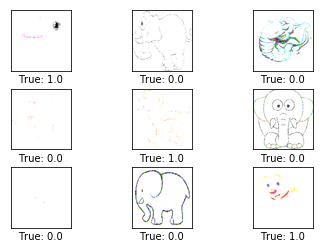

In [110]:
plot_images(images=test_images, cls_true=test_labels, smooth=True)

In [112]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

In [117]:
image_path='train/dog/pic_071.jpg'

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


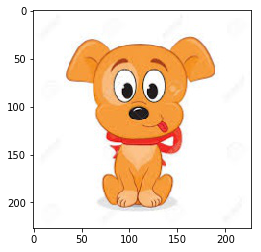

In [118]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [119]:
aug_iter = gen.flow(image)

In [120]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

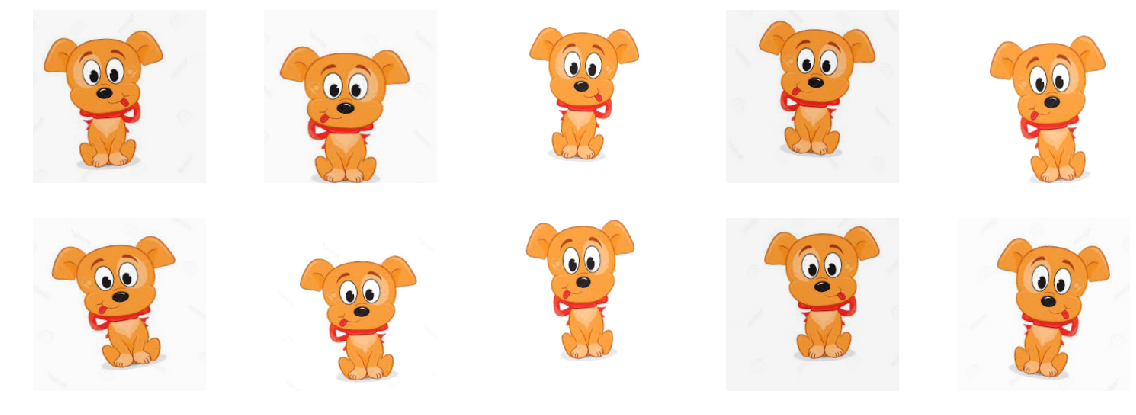

In [121]:
plots(aug_images, figsize=(20, 7), rows=2)

In [122]:
test_batches.class_indices #the index where one is

{'dog': 0, 'elephant': 1}

In [163]:
model.layers[0].get_config() # view details of intermediate layers

{'name': 'block1_conv1',
 'trainable': False,
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [166]:
model.count_params() #total number of parameters in the model

134260544

In [169]:
model.layers[0].count_params() #number of parameters in intermediate layers

1792

In [172]:
model.layers[2].count_params()

0

In [173]:
def plot_filters(layer, x, y):
    filters = layer.W.get_value()
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt


In [177]:
plot_filters(model.layers[3],8,4)


AttributeError: 'Conv2D' object has no attribute 'W'

In [180]:
model.layers[0].kernel

<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>